In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

#**Import Data**

In [2]:
pdata = pd.read_csv('/content/AirPassengers.csv', usecols=[1], engine='python')
pdata.head()

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [3]:
data = pd.read_csv('/content/AirPassengers.csv')

data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
data=data.set_index(['Month'])

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#**Data Analysis and Visualization**

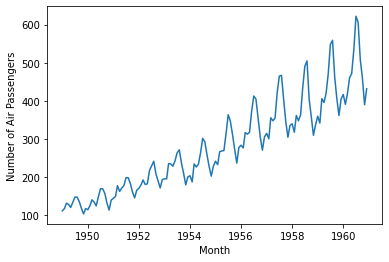

In [4]:
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(data)

Data is trending

In [5]:
data.isnull().sum()

#Passengers    0
dtype: int64

#**Data Preprocessing**

In [6]:
pdata.astype('float32')

,#Passengers
0,112.0
1,118.0
2,132.0
3,129.0
4,121.0
...,...
139,606.0
140,508.0
141,461.0
142,390.0


In [7]:
# normalize data as lstm is very senstive to the scale
scaler = MinMaxScaler()

pdata = scaler.fit_transform(pdata)
pdata

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [8]:
train_size = int(len(pdata) * .80)
test_size = len(pdata) - train_size

train_size, test_size

(115, 29)

In [9]:
train = pdata[0:train_size]
test = pdata[train_size:]

In [10]:
len(train), len(test)

(115, 29)

create a lookback, which is the number of previous timesteps that are used in order to predict the subsequent timestep 

In [11]:
# convert data to numpy array
def dataset(data, lookback):
  X, Y = [], []
  for i in range (len(pdata)-lookback-1):
    d = pdata[i:(i+lookback), 0]
    X.append(d) # number of passengers at a given time t
    Y.append(pdata[i + lookback, 0]) # number of passengers at t+1
  return np.array(X), np.array(Y)

X = t, Y = t+1

In [12]:
# reshape X and Y
lookback = 5
Xtrain, Ytrain = dataset(train, lookback)

Xtest, Ytest = dataset(test, lookback)

In [13]:
# reshap into [samples, time steps, features] format
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], 1, Xtrain.shape[1]))
Xtest = np.reshape(Xtest, (Xtest.shape[0], 1, Xtest.shape[1]))

#**Model Building**

In [14]:
model = tensorflow.keras.Sequential()
model.add(LSTM(36, input_shape=(1, lookback)))
model.add(Dense(1))

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
history = model.fit(Xtrain, Ytrain, validation_split=0.2, epochs=100, batch_size=5)

Epoch 1/100
22/22 [==============================] - 6s 69ms/step - loss: 0.0400 - val_loss: 0.0951
Epoch 2/100
22/22 [==============================] - 0s 11ms/step - loss: 0.0117 - val_loss: 0.0316
Epoch 3/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0083 - val_loss: 0.0285
Epoch 4/100
22/22 [==============================] - 1s 26ms/step - loss: 0.0078 - val_loss: 0.0288
Epoch 5/100
22/22 [==============================] - 0s 13ms/step - loss: 0.0074 - val_loss: 0.0270
Epoch 6/100
22/22 [==============================] - 0s 17ms/step - loss: 0.0070 - val_loss: 0.0272
Epoch 7/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0068 - val_loss: 0.0251
Epoch 8/100
22/22 [==============================] - 0s 15ms/step - loss: 0.0065 - val_loss: 0.0248
Epoch 9/100
22/22 [==============================] - 0s 16ms/step - loss: 0.0063 - val_loss: 0.0245
Epoch 10/100
22/22 [==============================] - 0s 12ms/step - loss: 0.0062 - val_loss: 0.0238

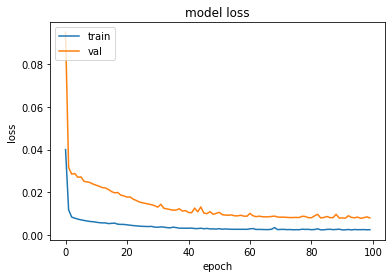

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
train_pred = model.predict(Xtrain)
train_pred = scaler.inverse_transform(train_pred)
Y_train = scaler.inverse_transform([Ytrain])
mse = math.sqrt(mean_squared_error(train_pred, Y_train[0]))

mse

5/5 [==============================] - 1s 9ms/step


30.349399831602

In [19]:
test_pred = model.predict(Xtest)
test_pred = scaler.inverse_transform(test_pred)
Y_test = scaler.inverse_transform([Ytest])
mse2 = math.sqrt(mean_squared_error(test_pred, Y_test[0]))

mse2

5/5 [==============================] - 0s 4ms/step


30.349399831602

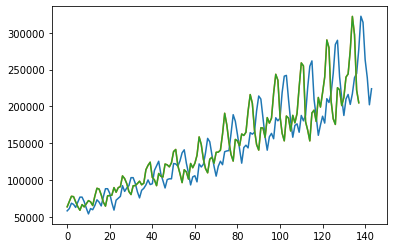

In [21]:
inverse_transform = plt.plot(scaler.inverse_transform(data))
train_plot = plt.plot(scaler.inverse_transform(train_pred))
test_plot = plt.plot(scaler.inverse_transform(test_pred))